In [ ]:
#################################### STROKE PREDICTION MINI PROJECT ###############################################################

In [14]:
# Load Data
import pandas as pd
df= pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [15]:
# Columns
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [16]:
# Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [17]:
# Describe
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


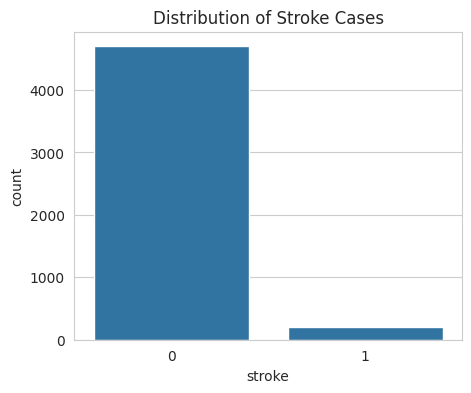

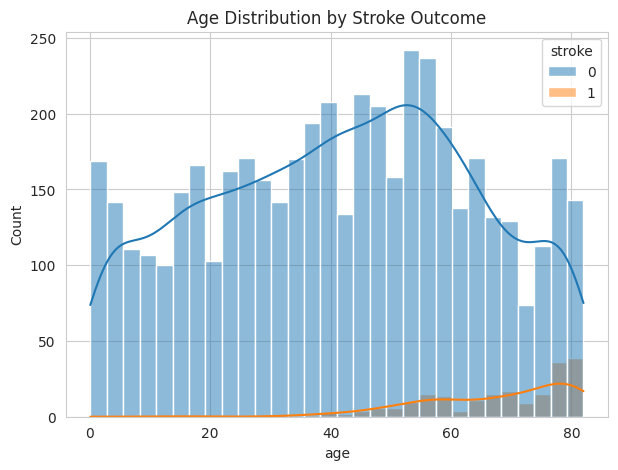

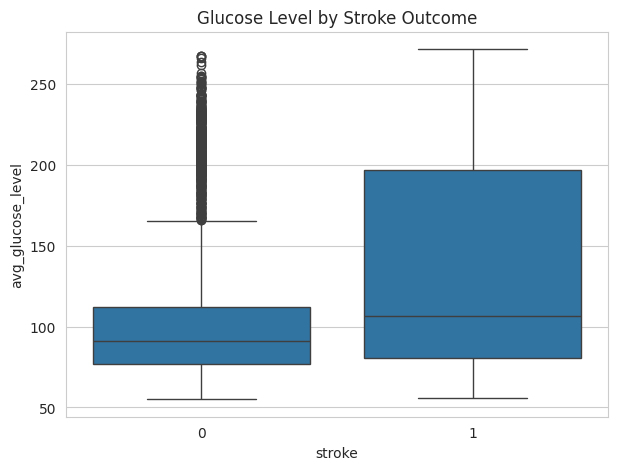

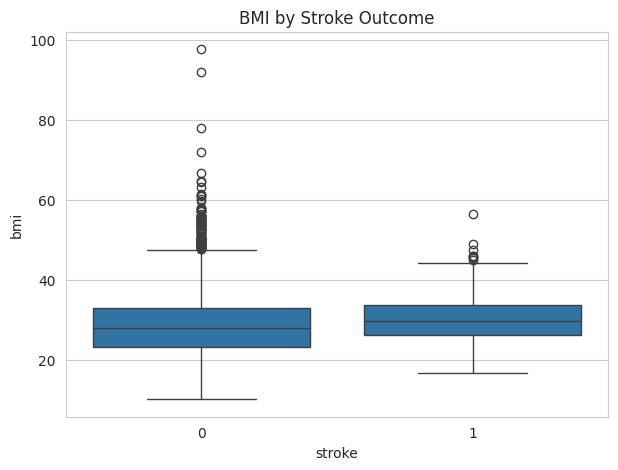

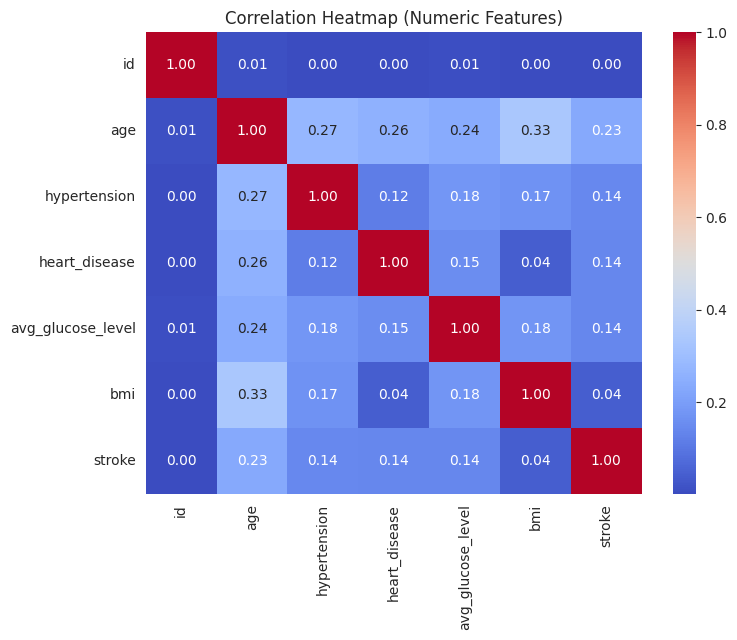

In [33]:
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import seaborn as sns            # Import seaborn for high-level statistical plots

# 1️⃣ Distribution of target variable (stroke)
plt.figure(figsize=(5,4))                     # Create a figure of size 5x4 inches
sns.countplot(x="stroke", data=df_analysis)   # Countplot to show number of 0's and 1's in 'stroke' column
plt.title("Distribution of Stroke Cases")     # Add a title to the plot
plt.show()                                    # Display the plot

# 2️⃣ Age distribution by stroke
plt.figure(figsize=(7,5))                    # Create a figure of size 7x5 inches
sns.histplot(
    data=df_analysis,                         # Dataset to use
    x="age",                                  # Numeric column for x-axis
    hue="stroke",                             # Color by stroke outcome (0 vs 1)
    bins=30,                                  # Number of bins for histogram
    kde=True                                   # Overlay kernel density estimate (smooth curve)
)
plt.title("Age Distribution by Stroke Outcome") # Add title
plt.show()                                      # Display the plot

# 3️⃣ Average glucose level by stroke
plt.figure(figsize=(7,5))                      # Create figure of size 7x5 inches
sns.boxplot(
    data=df_analysis,                           # Dataset to use
    x="stroke",                                 # Categorical variable for x-axis
    y="avg_glucose_level"                       # Numeric variable for y-axis
)
plt.title("Glucose Level by Stroke Outcome")    # Add title
plt.show()                                      # Display the plot

# 4️⃣ BMI distribution by stroke
plt.figure(figsize=(7,5))                      # Create figure
sns.boxplot(
    data=df_analysis,                           # Dataset to use
    x="stroke",                                 # Categorical variable for x-axis
    y="bmi"                                     # Numeric variable for y-axis
)
plt.title("BMI by Stroke Outcome")              # Add title
plt.show()                                      # Display the plot

# 5️⃣ Correlation heatmap for numeric features
plt.figure(figsize=(8,6))                                             # Create figure of size 8x6 inches
numeric_cols = df_analysis.select_dtypes(include=['float64', 'int64']) # Select only numeric columns for correlation
sns.heatmap(
    numeric_cols.corr(),              # Compute correlation matrix
    annot=True,                       # Show correlation values on heatmap
    cmap="coolwarm",                  # Colormap
    fmt=".2f"                         # Format correlation numbers to 2 decimal places
)
plt.title("Correlation Heatmap (Numeric Features)")  # Add title
plt.show()                                            # Display the plot


--- Initial Model Performance ---

Training Decision Tree...
Decision Tree Metrics:
  Accuracy  = 0.9246
  Precision = 0.2162
  Recall    = 0.1509
  F1 Score  = 0.1778

Training Random Forest...
Random Forest Metrics:
  Accuracy  = 0.9460
  Precision = 0.0000
  Recall    = 0.0000
  F1 Score  = 0.0000

Training AdaBoost...
AdaBoost Metrics:
  Accuracy  = 0.9460
  Precision = 0.0000
  Recall    = 0.0000
  F1 Score  = 0.0000

Training XGBoost...
XGBoost Metrics:
  Accuracy  = 0.9440
  Precision = 0.2500
  Recall    = 0.0189
  F1 Score  = 0.0351

Training CatBoost...
CatBoost Metrics:
  Accuracy  = 0.9460
  Precision = 0.0000
  Recall    = 0.0000
  F1 Score  = 0.0000

--- Feature Importance Analysis ---

Feature Importance for Decision Tree:
             Feature  Importance
7  avg_glucose_level    0.308330
8                bmi    0.226163
1                age    0.190558
9     smoking_status    0.098573
0             gender    0.059130
6     Residence_type    0.032678
5          work_type 

/tmp/ipython-input-94391839.py:134: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


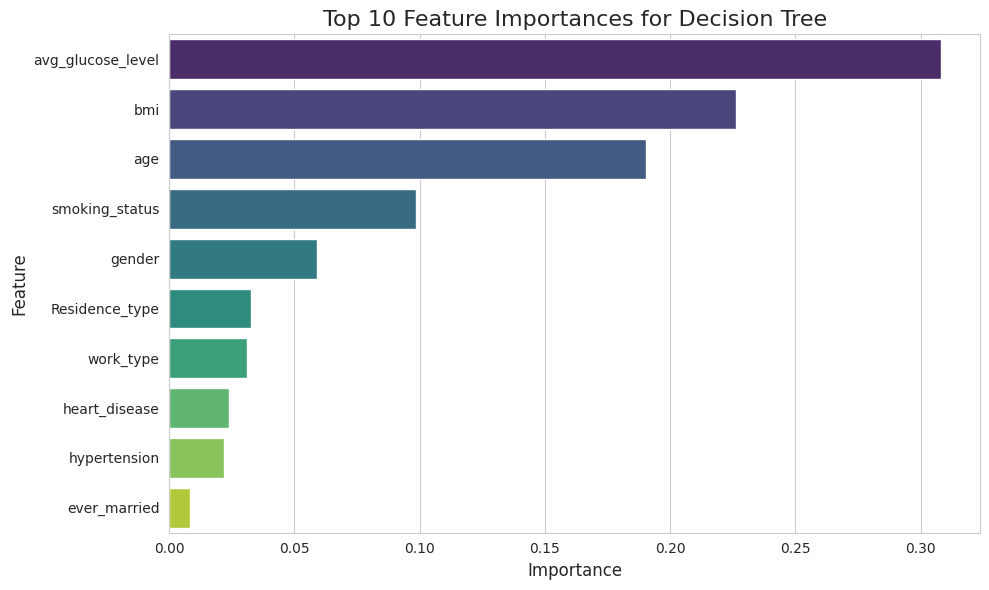


Feature Importance for Random Forest:
             Feature  Importance
7  avg_glucose_level    0.302550
8                bmi    0.236606
1                age    0.215514
9     smoking_status    0.067089
5          work_type    0.051142
0             gender    0.032880
6     Residence_type    0.032500
2       hypertension    0.024449
3      heart_disease    0.021383
4       ever_married    0.015887


/tmp/ipython-input-94391839.py:134: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


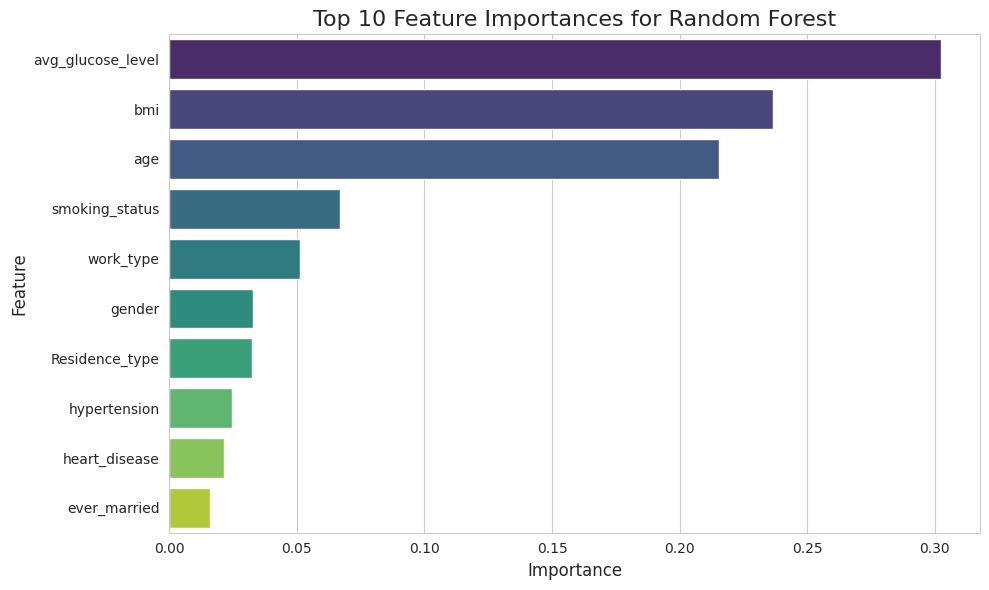


Feature Importance for AdaBoost:
             Feature  Importance
1                age    0.804317
8                bmi    0.133584
7  avg_glucose_level    0.062099
0             gender    0.000000
2       hypertension    0.000000
3      heart_disease    0.000000
5          work_type    0.000000
4       ever_married    0.000000
6     Residence_type    0.000000
9     smoking_status    0.000000


/tmp/ipython-input-94391839.py:134: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


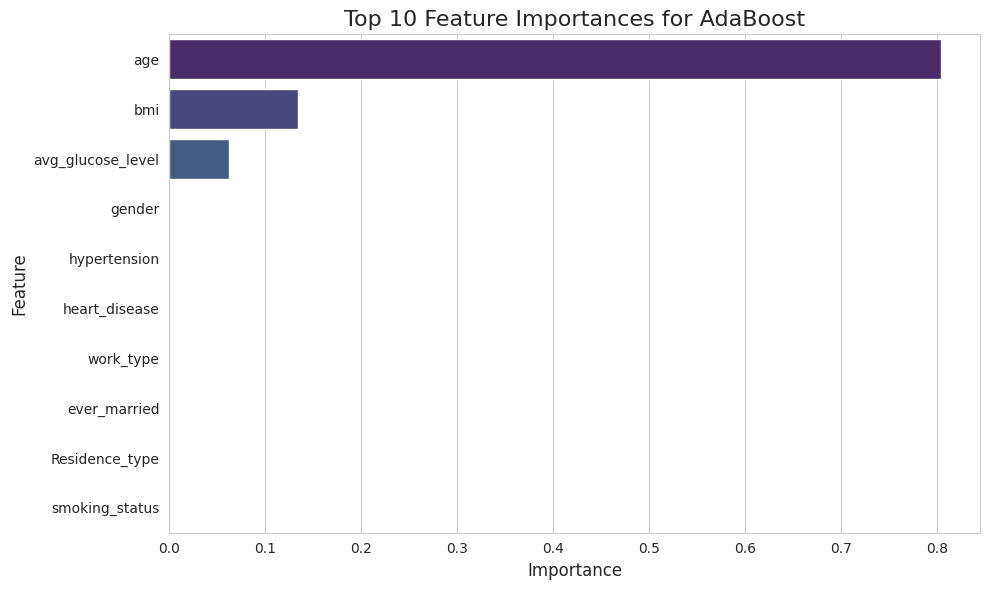


Feature Importance for XGBoost:
             Feature  Importance
1                age    0.194394
4       ever_married    0.129467
5          work_type    0.100270
2       hypertension    0.093991
3      heart_disease    0.093892
7  avg_glucose_level    0.093207
8                bmi    0.085645
9     smoking_status    0.078454
6     Residence_type    0.066598
0             gender    0.064082


/tmp/ipython-input-94391839.py:134: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


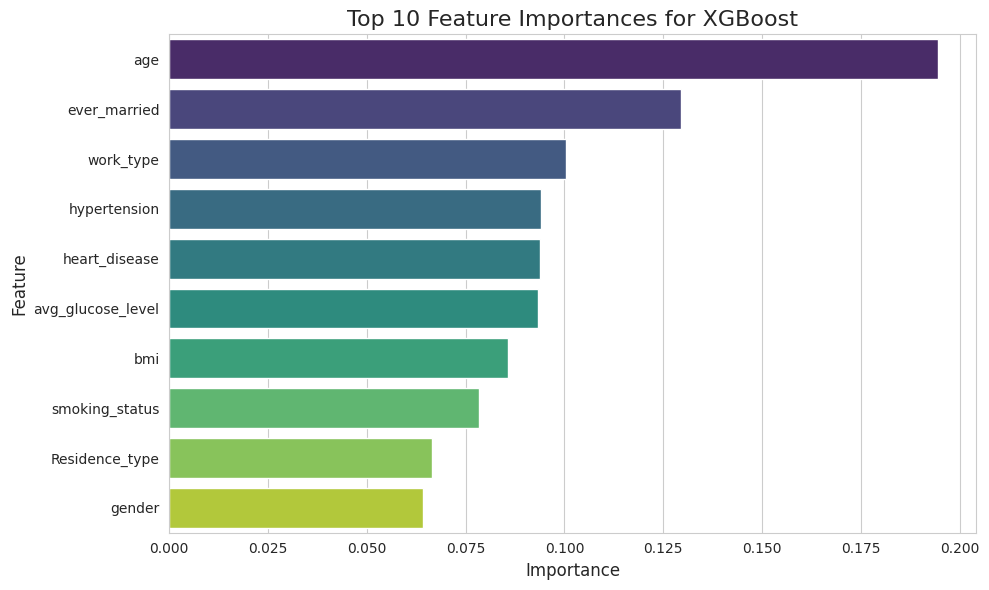


Feature Importance for CatBoost:
             Feature  Importance
1                age   27.886620
8                bmi   18.302356
7  avg_glucose_level   17.712259
9     smoking_status   10.335191
5          work_type    7.766138
0             gender    5.269653
4       ever_married    4.645608
6     Residence_type    3.765345
2       hypertension    2.624942
3      heart_disease    1.691889


/tmp/ipython-input-94391839.py:134: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


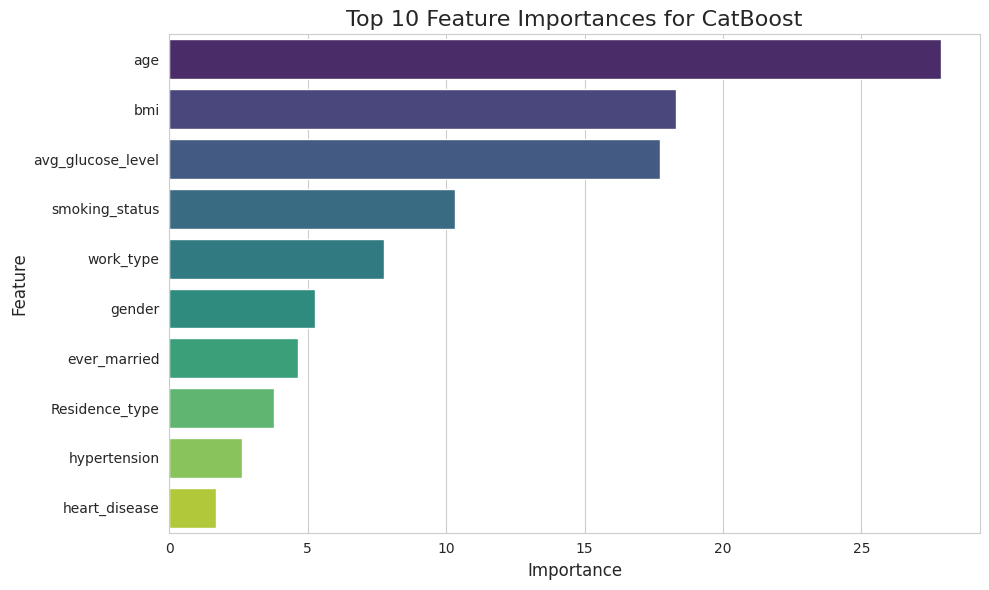


--- Hyperparameter Optimization ---

Optimizing Random Forest Classifier...
Fitting 3 folds for each of 36 candidates, totalling 108 fits

Random Forest Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest Best Accuracy Score: 0.9605296664120194

Optimizing XGBoost Classifier...
Fitting 3 folds for each of 10 candidates, totalling 30 fits

XGBoost Best Params: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.01}
XGBoost Best Accuracy Score: 0.9602750190985484

--- Saving the Best Model ---
The best performing model is: Random Forest with Accuracy score of 0.9460
The model's accuracy (0.9460) meets the threshold. Successfully saved the best model to best_model.pkl


In [32]:
# --- Step 1: Import all the necessary libraries we'll need ---

# pandas is for working with data in tables (DataFrames)
import pandas as pd
# numpy is for doing complex math and working with arrays
import numpy as np
# matplotlib and seaborn are for creating nice-looking plots and charts
import matplotlib.pyplot as plt
import seaborn as sns

# From scikit-learn, we import tools for splitting data, finding best settings, and calculating metrics
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
# This is a special tool to convert text labels (like 'Male', 'Female') into numbers
from sklearn.preprocessing import LabelEncoder
# These are our performance metrics to see how well the model works
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Here we import our classification models (the "classifiers" that predict a category)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# The pickle library is used to save our trained model so we don't have to retrain it later
import pickle

# --- Step 2: Set up the environment for better visuals ---

# This line gives our plots a clean, professional look
sns.set_style("whitegrid")
# These lines set the default size and quality for our plots
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

# --- Step 3: Load and clean the dataset ---

# We load the data from our CSV file into a pandas DataFrame (a table)
file_path = "healthcare-dataset-stroke-data.csv"
df = pd.read_csv(file_path)

# The 'bmi' column has some missing values marked as "N/A" (a text string).
# We replace these with a numerical "Not a Number" (np.nan) so we can drop them.
df["bmi"] = df["bmi"].replace("N/A", np.nan).astype(float)
# We then remove all rows that have any missing values
df.dropna(inplace=True)

# The 'id' column is just an identifier, it doesn't help in predicting stroke, so we remove it
df = df.drop("id", axis=1)

# --- Step 4: Prepare the data for machine learning models ---

# We identify all columns that contain text data (like 'gender', 'work_type')
categorical_cols = df.select_dtypes(include=["object"]).columns
# We create an encoder, which will convert these text categories into numbers
encoder = LabelEncoder()
# We loop through each text column and use the encoder to transform the data
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Now, we separate the data. X contains the features (all columns except 'stroke'), which are our inputs.
X = df.drop("stroke", axis=1)
# y is our target (the 'stroke' column), which is what we want to predict
y = df["stroke"]

# We split the data into two parts: a training set for the models to learn from,
# and a testing set to see how well they perform on new, unseen data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 5: Train and evaluate our models ---

print("--- Initial Model Performance ---")
# We create a dictionary to hold all the classification models we want to test
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, verbosity=0),
    "CatBoost": CatBoostClassifier(random_state=42, verbose=0)
}

trained_models = {} # We will store our trained models here
evaluation_metrics = {} # We will store their accuracy scores here

# We go through each model one by one
for name, model in models.items():
    print(f"\nTraining {name}...")
    # This line is where the model learns from our training data
    model.fit(X_train, y_train)
    # This line makes predictions on the test data
    y_pred = model.predict(X_test)
    # We save the trained model for later use
    trained_models[name] = model

    # We calculate different metrics to understand the model's performance
    # Accuracy: How many predictions were correct overall?
    accuracy = accuracy_score(y_test, y_pred)
    # Precision: When the model predicted 'stroke', how often was it right?
    precision = precision_score(y_test, y_pred, zero_division=0)
    # Recall: Out of all the actual 'stroke' cases, how many did the model find?
    recall = recall_score(y_test, y_pred, zero_division=0)
    # F1 Score: A balance between precision and recall, useful for uneven data
    f1 = f1_score(y_test, y_pred, zero_division=0)

    # We store the accuracy for comparing models later
    evaluation_metrics[name] = accuracy

    print(f"{name} Metrics:")
    print(f"  Accuracy  = {accuracy:.4f}")
    print(f"  Precision = {precision:.4f}")
    print(f"  Recall    = {recall:.4f}")
    print(f"  F1 Score  = {f1:.4f}")

# --- Step 6: Find out which features are most important ---

print("\n--- Feature Importance Analysis ---")
# We loop through each trained model
for name, model in trained_models.items():
    # We only check models that can tell us about feature importance (tree-based models)
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        feature_names = X.columns

        # We put the importance scores into a table (DataFrame) and sort them
        feature_importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False)

        print(f"\nFeature Importance for {name}:")
        print(feature_importance_df.head(10))

        # We create a bar plot to visualize the most important features
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
        plt.title(f'Top 10 Feature Importances for {name}', fontsize=16)
        plt.xlabel('Importance', fontsize=12)
        plt.ylabel('Feature', fontsize=12)
        plt.tight_layout()
        plt.show()

# --- Step 7: Fine-tune the best models to improve performance ---

print("\n--- Hyperparameter Optimization ---")

# We create a dictionary of settings (hyperparameters) to test for the Random Forest model
print("\nOptimizing Random Forest Classifier...")
rf_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
}
rf = RandomForestClassifier(random_state=42)
# GridSearchCV tries every possible combination of settings to find the best one
rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring="accuracy", n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)

print("\nRandom Forest Best Params:", rf_grid.best_params_)
print("Random Forest Best Accuracy Score:", rf_grid.best_score_)

# We create another dictionary of settings for the XGBoost model
print("\nOptimizing XGBoost Classifier...")
xgb_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.8, 1.0],
}
xgb = XGBClassifier(random_state=42, verbosity=0)
# RandomizedSearchCV randomly samples a few combinations, which is faster than GridSearchCV
xgb_random = RandomizedSearchCV(xgb, xgb_params, cv=3, scoring="accuracy", n_iter=10, n_jobs=-1, verbose=1)
xgb_random.fit(X_train, y_train)

print("\nXGBoost Best Params:", xgb_random.best_params_)
print("XGBoost Best Accuracy Score:", xgb_random.best_score_)


# --- Step 8: Save the best-performing model ---

print("\n--- Saving the Best Model ---")
# We find the model with the highest accuracy score from our initial evaluation
best_model_name = max(evaluation_metrics, key=evaluation_metrics.get)
best_model = trained_models[best_model_name]
best_model_accuracy = evaluation_metrics[best_model_name]

print(f"The best performing model is: {best_model_name} with Accuracy score of {best_model_accuracy:.4f}")

# We set a quality check: the model must have an accuracy above this number to be saved
accuracy_threshold = 0.9 # You can adjust this value

# If the best model's accuracy meets our threshold...
if best_model_accuracy >= accuracy_threshold:
    file_name = "best_model.pkl"
    # We use a try-except block to handle any potential errors during the saving process
    try:
        # We open a file and use the pickle library to save the model inside it
        with open(file_name, 'wb') as f:
            pickle.dump(best_model, f)
        print(f"The model's accuracy ({best_model_accuracy:.4f}) meets the threshold. Successfully saved the best model to {file_name}")
    except Exception as e:
        print(f"An error occurred while saving the model: {e}")
# ...otherwise, we don't save the model
else:
    print(f"The model's accuracy ({best_model_accuracy:.4f}) is below the threshold of {accuracy_threshold}. Model will not be saved.")
